# FIN 514 - PS4 Q1 BD
**Spring 2022**



In [8]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [16]:
# input parameters

start_step = 50
N = 1000
S0 = 100.0
K = 105.0
sigma = 0.3
r = 0.04 
T = 0.5 
q = 0 # dividend rate
cp = 0 #type of option put(0), call(1)
exact = 10.37597

## 1_b)
### BD Function

In [17]:

def BD_fun(S0, K, T, r, sigma, start_step, N):
      
#############################################################################################
    def bsm(S0, K, T, r, q, sigma, cp):
        mu = 0.0
        sd = 1.0

        d1 = (np.log(S0 / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S0 / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

        if cp == 1:
            value = S0 * np.exp(-q * T) * st.norm.cdf(d1, mu, sd) 
            value = value - K * np.exp(-r * T) * st.norm.cdf(d2, mu, sd) 
        else:
            value = -S0 * np.exp(-q * T) * st.norm.cdf(-d1, mu, sd) 
            value = value + K * np.exp(-r * T) * st.norm.cdf(-d2, mu, sd) 
    
        return value

#############################################################################################    
    
    # LIST TO SAVE RESULTS
    bda_result = []
        
    # CREATE TWO DIMENSIONAL ARRAY OF SIZE [N+1,N+1] TO STORE ALL STEPS
    
    option_value = np.zeros([N+1, N+1])

    # CREATE ARRAY FOR STOCK PRICES OF SIZE N+1,N+1
    
    stock_value = np.zeros([N+1, N+1])    
    
    # FOR LOOP STATEMENT: For a Binomial Tree from start_step to N
    for n in range(start_step, N+1):
        delta = T / n
        u = np.exp(sigma * (delta)**0.5)
        d = np.exp(-sigma * (delta)**0.5)
        qu = (np.exp(r * delta) - d) / (u - d)
        qd = 1 - qu
        
    # CALCULATE OPTION VALUES AT CERTAIN STEPS AND POSITIONS WITHIN THE BINOMIAL TREE:

        j = n-1 
        
        for i in range(0, j):    
    
            stock_value[j, i] = S0 * (u**i) * (d**(j - i))
            option_value[j, i] = bsm(stock_value[j, i], K, delta, r, q, sigma, 0)

        for j in range(n-2, -1, -1):

            for i in range(j, -1, -1):            
                stock_value[j, i] = S0 * (u**i) * (d**(j - i))
                pv = np.exp(-r * delta) * (qu * option_value[j + 1, i + 1] + qd * option_value[j + 1, i])
                option_value[j, i] = np.maximum(pv, K - stock_value[j, i])
                
    # RELAY OUTPUTS TO DICTIONARY
        output = {'num_steps': n, 'BD': option_value[0,0]}
        bda_result.append(output)

    return bda_result


In [18]:
bd = BD_fun(S0, K, T, r, sigma, start_step, N)

In [19]:
# CREATE A DATAFRAME FROM THE BINOMIAL MODEL OUTPUT
df = pd.DataFrame.from_dict(bd)
df

,num_steps,BD
0,50,10.389161
1,51,10.390397
2,52,10.388736
3,53,10.389852
4,54,10.388333
...,...,...
946,996,10.376879
947,997,10.376871
948,998,10.376877
949,999,10.376869


In [20]:
# comparing the model with our best binomial model with large N = 9999
df['error_BD'] = df["BD"] - exact 
df.to_csv("PS4_Q1_BD", index=False)
df

,num_steps,BD,error_BD
0,50,10.389161,0.013191
1,51,10.390397,0.014427
2,52,10.388736,0.012766
3,53,10.389852,0.013882
4,54,10.388333,0.012363
...,...,...,...
946,996,10.376879,0.000909
947,997,10.376871,0.000901
948,998,10.376877,0.000907
949,999,10.376869,0.000899


### CRR Error Rate

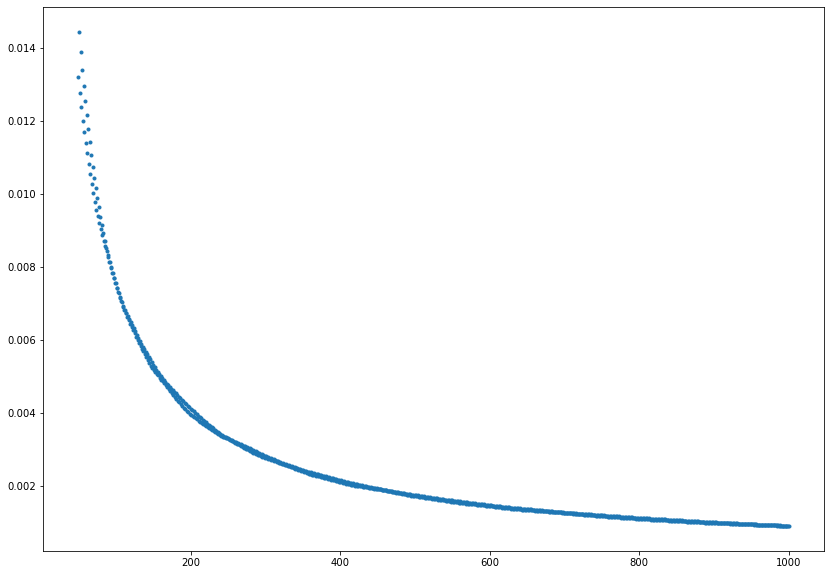

In [22]:
plt.figure(figsize=(14,10))
plt.plot(df['num_steps'], df['error_BD'], 'o', markersize=3)
plt.savefig('PS4_Q1_BD')
plt.show()